In [1]:
min_pos = 1
max_pos = 3
ratio = 2

In [2]:
pos = [ tuple(x.strip('\n').split(',')) for x in open('../data/positive_pair.csv').readlines() ]
neg = [ tuple(x.strip('\n').split(',')) for x in open('../data/negative_pair.csv').readlines() ]        

In [5]:
pos_dict = { k:[] for k,v in pos}
for k,v in pos:
    pos_dict[k].append(v)

In [6]:
len(pos_dict.keys())

27282

In [8]:
connection_count =  [ len(v) for k,v in pos_dict.items() ]

(array([1.3165e+04, 3.2820e+03, 2.3410e+03, 1.7020e+03, 1.2610e+03,
        9.4200e+02, 7.4100e+02, 5.3900e+02, 4.8400e+02, 4.3500e+02,
        3.8000e+02, 2.7800e+02, 2.0800e+02, 1.8800e+02, 1.5800e+02,
        1.3300e+02, 1.0400e+02, 7.6000e+01, 1.0200e+02, 1.5000e+02,
        5.9000e+01, 6.5000e+01, 4.8000e+01, 3.9000e+01, 3.2000e+01,
        2.1000e+01, 2.4000e+01, 2.0000e+01, 2.5000e+01, 2.6000e+01,
        2.0000e+01, 2.2000e+01, 1.3000e+01, 1.3000e+01, 1.4000e+01,
        6.0000e+00, 1.0000e+01, 1.3000e+01, 1.6000e+01, 4.0000e+00,
        6.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00, 7.0000e+00,
        4.0000e+00, 6.0000e+00, 3.0000e+00, 2.0000e+00, 5.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 9.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.00

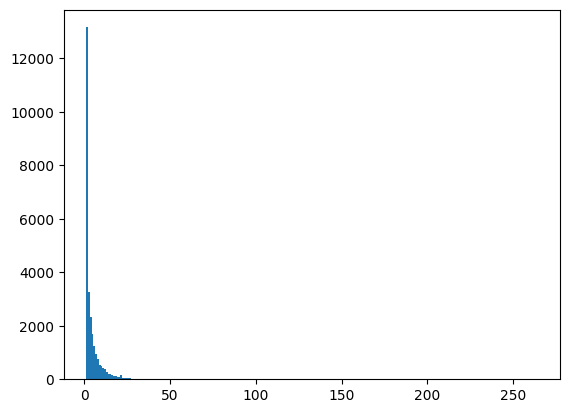

In [10]:
import matplotlib.pyplot as plt

plt.hist(connection_count,bins=250)

In [12]:
neg_dict = { k:[] for k,v in neg}
for k,v in neg:
    neg_dict[k].append(v)

In [13]:
connection_count =  [ len(v) for k,v in neg_dict.items() ]

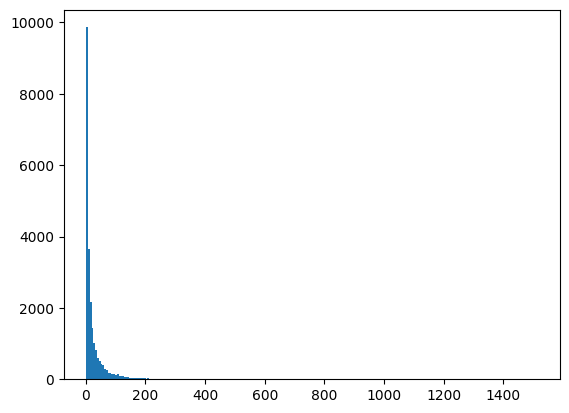

In [15]:
x = plt.hist(connection_count,bins=250)

In [17]:
neg_keys = set(neg_dict.keys())
pos_keys = set(pos_dict.keys())

In [21]:
common_keys = pos_keys.intersection(neg_keys)

#### Effectively we have only 23487 judgement which have both positive and negative judgements

In [22]:
# We will only take 5 positive links from each judgement and mimum 1 link such that 
# For each positive link there should be 2 negative links

In [24]:
dataset = {}
for key in common_keys:
    dataset[key] = (pos_dict[key],neg_dict[key])

In [25]:
# Negatives are not more than 2 twice the and atleast be 1:1

In [31]:
count = 0 
eq = 0
ratios = []
for key,val in dataset.items():
    ratio = float(len(val[1]))/len(val[0])
    ratios.append(ratio)
    if len(val[0])>len(val[1]):
        count+=1
    elif len(val[0]) == len(val[1]):
        eq +=1
        # print("Suprise")
print(count,eq)

2083 2399


(array([9.221e+03, 6.005e+03, 3.134e+03, 2.027e+03, 1.007e+03, 6.270e+02,
        4.160e+02, 2.290e+02, 1.660e+02, 1.440e+02, 1.150e+02, 5.800e+01,
        4.900e+01, 3.800e+01, 2.800e+01, 2.300e+01, 2.400e+01, 3.500e+01,
        2.200e+01, 1.100e+01, 6.000e+00, 7.000e+00, 1.100e+01, 1.000e+01,
        3.100e+01, 5.000e+00, 6.000e+00, 1.300e+01, 2.000e+00, 4.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

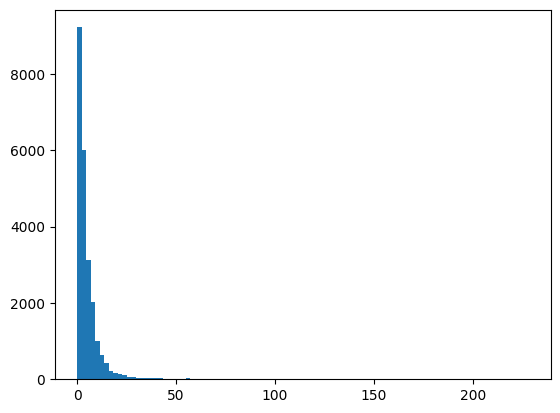

In [33]:
plt.hist(ratios,bins=100)